<a href="https://colab.research.google.com/github/MarkoJ-102-22/SPA_projekat/blob/main/SPAprojekat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skidanje modula

In [ ]:
! pip install transformers sentencepiece datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.5 MB/s eta 0:00:00


In [ ]:
! pip install transformers sentencepiece datasets

In [ ]:
from datasets import load_dataset
from google.colab import drive
from IPython.display import display
from IPython.html import widgets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torch import optim
from torch.nn import functional as F
from transformers import AdamW, AutoModelForSeq2SeqLM, AutoTokenizer
from transformers import get_linear_schedule_with_warmup
from tqdm import tqdm_notebook

sns.set()

/usr/local/lib/python3.10/dist-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model_repo = 'google/mt5-small'
model_path = '/content/gdrive/My Drive/SPAv2.pt'
#max_seq_len = model.config.max_length



In [ ]:
#moj test
#torch.save(model.state_dict(), model_path)

#Komentar o prethodnom kodu:

Ovaj deo koda vrši instalaciju nekih Python paketa, postavljanje određenih biblioteka i povezivanje sa Google Drive-om. Evo šta svaka linija koda radi:

! pip install transformers sentencepiece datasets: Instalira Python pakete transformers, sentencepiece i datasets.

from datasets import load_dataset: Uvozi funkciju load_dataset iz biblioteke datasets. Ova funkcija omogućava učitavanje različitih skupova podataka.

from google.colab import drive: Uvozi modul drive iz biblioteke google.colab koji omogućava povezivanje sa Google Drive-om.

from IPython.display import display: Uvozi funkciju display koja se koristi za prikazivanje rezultata u Jupyter radnoj svesci.

from IPython.html import widgets: Uvozi module widgets iz IPython.html za rad sa interaktivnim elementima.

import matplotlib.pyplot as plt: Uvozi matplotlib.pyplot za crtanje grafova.

import numpy as np: Uvozi numpy za rad sa numeričkim podacima.

import seaborn as sns: Uvozi seaborn za lepše prikazivanje grafova.

import torch: Uvozi torch za rad sa tenzorima i mašinskim učenjem.

from torch import optim: Uvozi optim za rad sa optimizatorima u PyTorch-u.

from torch.nn import functional as F: Uvozi F iz torch.nn za rad sa funkcijama aktivacije i drugim funkcijama koje se koriste u neuronskim mrežama.

from transformers import AdamW, AutoModelForSeq2SeqLM, AutoTokenizer: Uvozi nekoliko klasa iz transformers biblioteke, uključujući AdamW za optimizaciju, AutoModelForSeq2SeqLM za modeliranje sekvenci i AutoTokenizer za tokenizaciju.

from transformers import get_linear_schedule_with_warmup: Uvozi funkciju get_linear_schedule_with_warmup za dinamičko podešavanje stope učenja tokom treninga.

from tqdm import tqdm_notebook: Uvozi tqdm_notebook za praćenje napretka u iteracijama petlje.

sns.set(): Postavlja stil za crtanje grafova pomoću seaborn.

drive.mount('/content/gdrive'): Montira Google Drive na lokaciju /content/gdrive kako bi se mogli pristupiti fajlovima sa Drive-a.

model_repo = 'google/mt5-small': Postavlja promenljivu model_repo na vrednost 'google/mt5-small'.

model_path = '/content/gdrive/My Drive/SPAv2.pt': Postavlja promenljivu model_path na putanju gde će se čuvati model na Google Drive-u.

moj test: Ova linija sadrži komentar koji ukazuje da je ovo testni deo koda. Isključeno je, ali možete otkomentarisati kako biste sačuvali stanje modela.

## Ucitavanje tokenizera i modela

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_repo)

tokenizer_config.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained(model_repo)
model = model.cuda()
max_seq_len = model.config.max_length

pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

#Komentar o prethodnom kodu:


tokenizer = AutoTokenizer.from_pretrained(model_repo): Kreira se tokenizator pomoću AutoTokenizer.from_pretrained funkcije iz transformers biblioteke. Tokenizator se inicijalizuje prethodno obučenim modelom čija je putanja data u promenljivoj model_repo.

model = AutoModelForSeq2SeqLM.from_pretrained(model_repo): Kreira se sekvencijalni model za mašinsko učenje (Seq2SeqLM) pomoću AutoModelForSeq2SeqLM.from_pretrained funkcije. Model se takođe inicijalizuje prethodno obučenim modelom čija je putanja data u promenljivoj model_repo.

model = model.cuda(): Premešta model na GPU pomoću .cuda() metode. Ovo ubrzava treniranje modela ako imate GPU.

max_seq_len = model.config.max_length: Postavlja se promenljiva max_seq_len na maksimalnu dužinu sekvence koju model može obraditi. Ova vrednost se dobija iz konfiguracije modela.

# Pregked i test

In [ ]:
input_sent= 'Here is our sentence!'
token_ids=tokenizer.encode(input_sent , return_tensors='pt').cuda()

token_ids

model_out = model.generate(token_ids)
print(model_out)

output_text = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(model_out[0]))
print(output_text)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


tensor([[     0, 250099,      1]], device='cuda:0')
<pad> <extra_id_0></s>


#Komentar o prethodnom kodu:


input_sent = 'Here is our sentence!': Postavlja se ulazni tekst u promenljivu input_sent.

token_ids = tokenizer.encode(input_sent, return_tensors='pt').cuda(): Tokenizuje se ulazni tekst pomoću tokenizatora koji ste prethodno inicijalizovali. Rezultat, tj. tokeni, se čuvaju u tenzoru (return_tensors='pt') i zatim se premesti na GPU pomoću .cuda() metode.

token_ids: Prikazuje tenzor koji sadrži tokenizovane vrednosti ulaznog teksta.

model_out = model.generate(token_ids): Koristi se generativni deo modela za generisanje izlazne sekvence na osnovu tokena ulaznog teksta.

print(model_out): Ispisuje generisanu sekvencu tokena.

output_text = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(model_out[0])): Konvertuje se generisana sekvencu tokena u tekst pomoću tokenizatora.

print(output_text): Ispisuje se generisani tekst.

U suštini, ovaj deo koda koristi prethodno inicijalizovan model i tokenizator da generiše sekvencu tokena na osnovu unetog teksta.

# Testiranje tokenizera

In [ ]:
example_input_str = ' <sr>This is a test bngf'
input_ids = tokenizer.encode(example_input_str, return_tensors='pt')
print('Input IDs=', input_ids)

tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
print('Tokens:',tokens)

Input IDs= tensor([[ 1042,   263,   286,   669, 13673,   339,   259,   262,  2978,   330,
           370,   367,     1]])
Tokens: ['▁<', 's', 'r', '>', 'This', '▁is', '▁', 'a', '▁test', '▁b', 'ng', 'f', '</s>']


#Komentar o prethodnom kodu:

example_input_str = ' < sr >This is a test bngf': Postavlja se primer ulaznog teksta u promenljivu example_input_str.

input_ids = tokenizer.encode(example_input_str, return_tensors='pt'): Koristi se tokenizator da enkodira ulazni tekst u ID-jeve tokena. Rezultat je tenzor koji sadrži enkodirane vrednosti tokena. Napomena: nije korišćena cuda() metoda ovde, jer nema potrebe za premestanjem na GPU u ovom slučaju.

print('Input IDs=', input_ids): Ispisuje enkodirane ID-jeve tokena.

tokens = tokenizer.convert_ids_to_tokens(input_ids[0]): Konvertuje enkodirane ID-jeve tokena nazad u sam tekst pomoću tokenizatora.

print('Tokens:', tokens): Ispisuje rezultujuće tokene.

Ovaj deo koda demonstrira kako možete enkodirati tekst u ID-jeve tokena pomoću prethodno inicijalizovanog tokenizatora, kao i kako možete konvertovati enkodirane ID-jeve tokena nazad u tokene.

# Dodavanje baze podataka

In [ ]:
dataset = load_dataset("opus100", "en-sr")

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/1000000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
train_dataset=dataset['train']
test_dataset=dataset['test']


In [ ]:
train_dataset[0]

{'translation': {'en': '- Black.', 'sr': '- Crna.'}}

In [ ]:
LANG_TOKEN_MAPPING={
    'en' : '<en>',
    'sr' : '<sr>'
}

In [ ]:
special_tokens_dict = {'additional_special_tokens': list(LANG_TOKEN_MAPPING.values())}
tokenizer.add_special_tokens(special_tokens_dict)
model.resize_token_embeddings(len(tokenizer))

Embedding(250102, 512)

In [ ]:
token_ids = tokenizer.encode(
    example_input_str, return_tensors='pt',
    padding='max_length',
    truncation=True, max_length=max_seq_len)
print(token_ids)

#tokens = tokenizer.convert_ids_to_tokens(token_ids[0])
#print(tokens)

tensor([[   259, 250101,   1494,    339,    259,    262,   2978,    330,    370,
            367,      1,      0,      0,      0,      0,      0,      0,      0,
              0,      0]])


In [ ]:
def encode_input_str(text, target_lang, tokenizer, seq_len,
                     lang_token_map=LANG_TOKEN_MAPPING):
  target_lang_token = lang_token_map[target_lang]


  input_ids = tokenizer.encode(
      text = target_lang_token + text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)

  return input_ids[0]

def encode_target_str(text, tokenizer, seq_len,
                      lang_token_map=LANG_TOKEN_MAPPING):
  token_ids = tokenizer.encode(
      text = text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)

  return token_ids[0]

def format_translation_data(translations, lang_token_map, tokenizer, seq_len=128):



  langs = list(lang_token_map.keys())
  input_lang, target_lang = np.random.choice(langs, size=2, replace=False)


  input_text = translations[input_lang]
  target_text = translations[target_lang]

  if input_text is None or target_text is None:
    return None

  input_token_ids = encode_input_str(
      input_text, target_lang, tokenizer, seq_len, lang_token_map)

  target_token_ids = encode_target_str(
      target_text, tokenizer, seq_len, lang_token_map)

  return input_token_ids, target_token_ids

def transform_batch(batch, lang_token_map, tokenizer):
  inputs = []
  targets = []
  for translation_set in batch['translation']:
    formatted_data = format_translation_data(
        translation_set, lang_token_map, tokenizer, max_seq_len)

    if formatted_data is None:
      continue

    input_ids, target_ids = formatted_data
    inputs.append(input_ids.unsqueeze(0))
    targets.append(target_ids.unsqueeze(0))

  batch_input_ids = torch.cat(inputs).cuda()
  batch_target_ids = torch.cat(targets).cuda()

  return batch_input_ids, batch_target_ids

def get_data_generator(dataset, lang_token_map, tokenizer, batch_size=32):
  dataset = dataset.shuffle()
  for i in range(0, len(dataset), batch_size):
    raw_batch = dataset[i:i+batch_size]
    yield transform_batch(raw_batch, lang_token_map, tokenizer)

In [ ]:
in_ids,out_ids =format_translation_data(
    train_dataset[12]['translation'], LANG_TOKEN_MAPPING,tokenizer)

print(' '.join(tokenizer.convert_ids_to_tokens(in_ids)))
print(' '.join(tokenizer.convert_ids_to_tokens(out_ids)))

data_gen= get_data_generator(train_dataset, LANG_TOKEN_MAPPING, tokenizer, 8)
data_batch=next(data_gen)
print('input shape:',data_batch[0].shape)
print('output shape:',data_batch[1].shape)

<sr> ▁I ▁just ▁need ▁ these ▁two ▁things . </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
▁Samo ▁mi ▁treba ▁ ova ▁dva . </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>

#Komentar o prethodnom kodu:


dataset = load_dataset("opus100", "en-sr"): Koristi se funkcija load_dataset iz biblioteke datasets kako bi se učitao skup podataka "opus100" sa prevodom iz engleskog na srpski.

train_dataset = dataset['train'] i test_dataset = dataset['test']: Deli se skup podataka na skup za treniranje i skup za testiranje.

LANG_TOKEN_MAPPING: Mapiranje jezika na posebne tokene. U ovom slučaju, engleski je predstavljen sa < en >, a srpski sa < sr >.

special_tokens_dict i promene u tokenizatoru: Dodaju se specijalni tokeni u tokenizator koji predstavljaju jezike definisane u LANG_TOKEN_MAPPING. Zatim se menja veličina tokenizatora kako bi se uzeli u obzir dodatni specijalni tokeni.

token_ids: Tokenizuje se ulazni tekst koristeći promenljivu example_input_str. Ovde se takođe primenjuju podesavanja za maksimalnu dužinu sekvence.

Funkcije encode_input_str, encode_target_str, i format_translation_data: Ove funkcije se koriste za formatiranje podataka u odgovarajući oblik koji će se koristiti tokom treniranja modela.

transform_batch: Ova funkcija obrađuje batch prevoda tako da ih pretvara u oblik pogodan za treniranje modela. Takođe, koristi GPU za obradu.

get_data_generator: Generator podataka koji omogućava iteraciju kroz batch-ove podataka.

Primer korišćenja funkcija: Demonstrira se kako koristiti ove funkcije na jednom uzorku iz trening skupa.


# Treniranje

In [ ]:
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [ ]:

n_epochs = 6
batch_size = 16
print_freq = 50
checkpoint_freq = 1000
lr = 5e-4
n_batches = int(np.ceil(len(train_dataset) / batch_size))
total_steps = n_epochs * n_batches
n_warmup_steps = int(total_steps * 0.01)

In [ ]:

optimizer = AdamW(model.parameters(), lr=lr)
scheduler = get_linear_schedule_with_warmup(
    optimizer, n_warmup_steps, total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
losses = []

In [ ]:
def eval_model(model, gdataset, max_iters=8):
  test_generator = get_data_generator(gdataset, LANG_TOKEN_MAPPING,
                                      tokenizer, batch_size)
  eval_losses = []
  for i, (input_batch, label_batch) in enumerate(test_generator):
    if i >= max_iters:
      break

    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)
    eval_losses.append(model_out.loss.item())

  return np.mean(eval_losses)

In [ ]:
test_loss = eval_model(model, test_dataset)

In [ ]:
for epoch_idx in range(n_epochs):
  # Randomize data order
  data_generator = get_data_generator(train_dataset, LANG_TOKEN_MAPPING,
                                      tokenizer, batch_size)

  for batch_idx, (input_batch, label_batch) \
      in tqdm_notebook(enumerate(data_generator), total=n_batches):
    optimizer.zero_grad()

    #forward pass
    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)

    # Calculate loss and update weights
    loss = model_out.loss
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    scheduler.step()

    # Print training update info
    if (batch_idx + 1) % print_freq == 0:
      avg_loss = np.mean(losses[-print_freq:])
      print('Epoch: {} | Step: {} | Avg. loss: {:.3f} | lr: {}'.format(
          epoch_idx+1, batch_idx+1, avg_loss, scheduler.get_last_lr()[0]))

    if (batch_idx + 1) % checkpoint_freq == 0:
      test_loss = eval_model(model, test_dataset)
      print('Saving model with test loss of {:.3f}'.format(test_loss))
      torch.save(model.state_dict(), model_path)

torch.save(model.state_dict(), model_path)

<ipython-input-31-0c35812db502>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  in tqdm_notebook(enumerate(data_generator), total=n_batches):


  0%|          | 0/62500 [00:00<?, ?it/s]

Epoch: 1 | Step: 50 | Avg. loss: 0.977 | lr: 2.0933333333333335e-05
Epoch: 1 | Step: 100 | Avg. loss: 0.975 | lr: 2.76e-05
Epoch: 1 | Step: 150 | Avg. loss: 0.968 | lr: 3.426666666666667e-05
Epoch: 1 | Step: 200 | Avg. loss: 0.936 | lr: 4.093333333333334e-05
Epoch: 1 | Step: 250 | Avg. loss: 0.931 | lr: 4.7600000000000005e-05
Epoch: 1 | Step: 300 | Avg. loss: 0.931 | lr: 5.4266666666666667e-05
Epoch: 1 | Step: 350 | Avg. loss: 0.896 | lr: 6.0933333333333335e-05
Epoch: 1 | Step: 400 | Avg. loss: 0.949 | lr: 6.759999999999999e-05
Epoch: 1 | Step: 450 | Avg. loss: 0.940 | lr: 7.426666666666666e-05
Epoch: 1 | Step: 500 | Avg. loss: 0.965 | lr: 8.093333333333333e-05
Epoch: 1 | Step: 550 | Avg. loss: 1.013 | lr: 8.76e-05
Epoch: 1 | Step: 600 | Avg. loss: 0.955 | lr: 9.426666666666666e-05
Epoch: 1 | Step: 650 | Avg. loss: 0.912 | lr: 0.00010093333333333334
Epoch: 1 | Step: 700 | Avg. loss: 0.963 | lr: 0.0001076
Epoch: 1 | Step: 750 | Avg. loss: 0.932 | lr: 0.00011426666666666667
Epoch: 1 | St

KeyboardInterrupt: ignored

#Komentar o prethodnom kodu:

model.load_state_dict(torch.load(model_path)): Učitava se prethodno sačuvano stanje modela sa diska.

Postavljaju se hiperparametri za treniranje, kao što su broj epoha (n_epochs), veličina batch-a (batch_size), učestalost ispisa rezultata (print_freq), učestalost čuvanja kontrolnih tačaka (checkpoint_freq), stopa učenja (lr), broj koraka zagrevanja (n_warmup_steps), ukupan broj batch-eva (n_batches), i ukupan broj koraka (total_steps).

Inicijalizuju se optimizator i rasporeditelj za postepeno smanjenje stope učenja.

Definiše se prazna lista losses koja će sadržavati vrednosti gubitka tokom treninga.

eval_model: Funkcija za evaluaciju modela na test skupu podataka. Izračunava se prosečan gubitak na test skupu.

Inicijalizuje se test_loss pozivom funkcije eval_model za procenu početnog stanja modela na test skupu.

Ulazi se u petlju po epohama (for epoch_idx in range(n_epochs)), a zatim se podaci učitavaju koristeći generator podataka.

Unutar petlje po batch-ovima, sprovodi se treniranje modela. optimizer.zero_grad() postavlja gradijente na nulu, a zatim se radi prolaz unapred (forward pass) i izračunava gubitak. Gradijenti se zatim računaju i primenjuju na modele (backward pass). Optimizator ažurira težine, a rasporeditelj smanjuje stopu učenja.

Ispisuje se informacije o treniranju, uključujući epohu, korak, prosečni gubitak i stopu učenja.

Na određenim intervalima, model se evaluira na test skupu i čuva se ako je gubitak manji od prethodnog najmanjeg gubitka.

Na kraju, model se ponovo čuva na disku.

Ovo je osnovni okvir treniranja sekvencijalnog modela za mašinsko učenje.





# Graf gubitaka

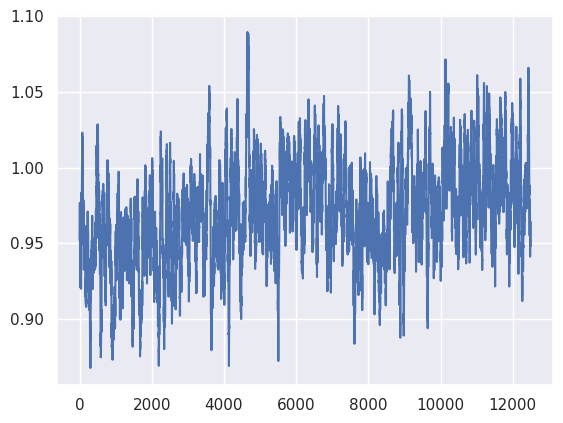

In [ ]:


window_size = 50
smoothed_losses = []
for i in range(len(losses)-window_size):
  smoothed_losses.append(np.mean(losses[i:i+window_size]))

plt.plot(smoothed_losses[100:])

#Komentar o prethodnom kodu:

Ovaj deo koda prikazuje grafikon gubitaka tokom treniranja, koristeći prozor za glačanje (smoothing window). Evo šta svaki deo koda radi:

window_size = 50: Postavlja se veličina prozora za glačanje.

smoothed_losses = []: Inicijalizuje se prazna lista za glačane gubitke.

Petlja for i in range(len(losses)-window_size): Iterira se kroz gubitke i za svaki korak pravi se prozor širine window_size i računa se srednja vrednost.

plt.plot(smoothed_losses[100:]): Koristi se matplotlib za iscrtavanje grafikona glačanih gubitaka.

Ova vizualizacija pomaže u praćenju trenda gubitaka tokom treniranja i može pružiti uvid u to kako se model poboljšava tokom vremena.

# Rucno testiranje

In [ ]:
test_sentence = test_dataset[0]['translation']['en']
print('Raw input text:', test_sentence)

input_ids = encode_input_str(
    text = test_sentence,
    target_lang = 'sr',
    tokenizer = tokenizer,
    seq_len = model.config.max_length,
    lang_token_map = LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

print('Truncated input text:', tokenizer.convert_tokens_to_string(
    tokenizer.convert_ids_to_tokens(input_ids[0])))

Raw input text: ~ That is not bad at all. ~ Yeah.
Truncated input text: <sr> ~ That is not bad at all. ~ Yeah.</s><pad><pad><pad><pad><pad><pad>


#Komentar o prethodnom kodu:

 Ispisuje enkodiranu rečenicu na srpskom jeziku. Ovde se konvertuju ID-jevi tokena nazad u tekst, a zatim se tekst ponovno tokenizuje u string koji se može pročitati.Ovim postupkom priprema se rečenica za dalje korišćenje u testiranju modela.

In [ ]:
output_tokens = model.generate(input_ids, num_beams=10, num_return_sequences=3)
# print(output_tokens)
for token_set in output_tokens:
  print(tokenizer.decode(token_set, skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


To uopšte nije loše.
To nije loše uopšte.
- To uopšte nije loše.


#Komentar o prethodnom kodu:


output_tokens = model.generate(input_ids, num_beams=10, num_return_sequences=3): Koristi se model za generisanje izlaznih tokena na osnovu ulaznih tokena. Parametri num_beams=10 i num_return_sequences=3 određuju da model generiše 3 različite sekvence sa po 10 grebena (beams) tokom procesa dekodiranja.

for token_set in output_tokens: print(tokenizer.decode(token_set, skip_special_tokens=True)): Iterira se kroz svaki set generisanih tokena i dekodira ih nazad u tekst koristeći tokenizator. skip_special_tokens=True se koristi kako bi se izbegli specijalni tokeni poput <pad> ili <eos>.


In [ ]:
#@title Prevodjenje
input_text = 'Ja sam Marko i idem na fakultet u Banjaluci.' #@param {type:"string"}
output_language = 'en' #@param ["en", "sr"]

input_ids = encode_input_str(
    text = input_text,
    target_lang = output_language,
    tokenizer = tokenizer,
    seq_len = model.config.max_length,
    lang_token_map = LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

output_tokens = model.generate(input_ids, num_beams=20, length_penalty=0.2)
print(input_text + '  ->  ' + \
      tokenizer.decode(output_tokens[0], skip_special_tokens=True))

Ja sam Marko i idem na fakultet u Banjaluci.  ->  I'm Mark and I'm going to college in Banjaluka.


#Komentar o prethodnom kodu:

input_text = 'Ja sam Marko i idem na fakultet u Banjaluci.': Unosi se tekst koji želite prevesti.

output_language = 'en': Bira se ciljni jezik na koji želite prevesti tekst. Možete izabrati između engleskog (en) i srpskog (sr) jezika.

input_ids = encode_input_str(...): Poziva se funkcija encode_input_str kako bi se enkodovala unijeta rečenica, dodali odgovarajući jezički tokeni, izvršila tokenizacija i prilagođavanje za treniranje modela.

output_tokens = model.generate(...): Koristi se obučeni model da generiše prevod na osnovu enkodirane rečenice. Parametri num_beams=20 i length_penalty=0.2 se koriste za generisanje prevoda koristeći tehniku dekodiranja sa 20 grebena, s tim da se favorizuju kraće sekvence.

print(input_text + ' -> ' + tokenizer.decode(output_tokens[0], skip_special_tokens=True)): Ispisuje se rezultat prevođenja - originalna rečenica i generisani prevod.

Ovaj kod vam omogućava da eksperimentalno testirate kako model radi na vašem sopstvenom tekstu i birate ciljni jezik.